<a href="https://colab.research.google.com/github/Tajyu/Master_Degree_Paper/blob/main/Code/Filter_64/No%20input_dim/3Class_Genus_V3_BatchNormal_64_Layer_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import os
import pathlib
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout

In [ ]:
image_list = os.listdir('/content/drive/MyDrive/Colab Notebooks/Final_Project/Cell_Genus')

In [ ]:
print(image_list)

['10_Genus_Stauroneis_Ehrenberg', '10_Genus_Staurosira_Ehrenberg', '11_Genus_Craspedostauros_E.J_Cox_1999', '11_Genus_Staurosirella_Williams_and_Round', '12_Genus_Caloneis_Cleve_1894', '12_Genus_Synedra_Ehrenberg', '13_Genus_Pinnularia_Ehrenberg_1843', '1_Genus_Acanthoceras_Honigmann', '1_Genus_Achnanthes_Bory', '1_Genus_Actinocyclus_Ehrenberg', '1_Genus_Aphanocapsa_Nageli_1849', '1_Genus_Asterionella_Hassall', '1_Genus_Aulacoseira', '1_Genus_Biremis_Mann_et_Cox_in_Round_Crawford_and_Mann', '1_Genus_Characium_A_Braun_in_Kutzing_1849', '1_Genus_Chroococcus_Nageli', '1_Genus_Closterium_Nitzsch_ex_Ralfs_1848', '1_Genus_Coelastrum_Nageli_1849', '1_Genus_Cylindrocystis_Meneghini_ex_de_Bary_1858', '1_Genus_Dictyosphaerium_Nageli_1849', '1_Genus_Docidium_Brebisson_ex_Ralfs_1848', '1_Genus_Eunotia_Ehrenberg', '1_Genus_Geitlerinema_(Anagnostidis_et_Komarek)_Anagnostidis_1989', '1_Genus_Gonatozygon_de_Bary_1856', '1_Genus_Hydrodictyon_Roth_1797', '1_Genus_Hydrosera_whampoensis', '1_Genus_Jaagine

In [ ]:
data_generator = ImageDataGenerator(rescale = 1./255)

data_dir = "/content/drive/MyDrive/Colab Notebooks/Final_Project/Cell_Genus"

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  color_mode = "grayscale",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6226 files belonging to 107 classes.
Using 4981 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  color_mode = "grayscale",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6226 files belonging to 107 classes.
Using 1245 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['10_Genus_Stauroneis_Ehrenberg', '10_Genus_Staurosira_Ehrenberg', '11_Genus_Craspedostauros_E.J_Cox_1999', '11_Genus_Staurosirella_Williams_and_Round', '12_Genus_Caloneis_Cleve_1894', '12_Genus_Synedra_Ehrenberg', '13_Genus_Pinnularia_Ehrenberg_1843', '1_Genus_Acanthoceras_Honigmann', '1_Genus_Achnanthes_Bory', '1_Genus_Actinocyclus_Ehrenberg', '1_Genus_Aphanocapsa_Nageli_1849', '1_Genus_Asterionella_Hassall', '1_Genus_Aulacoseira', '1_Genus_Biremis_Mann_et_Cox_in_Round_Crawford_and_Mann', '1_Genus_Characium_A_Braun_in_Kutzing_1849', '1_Genus_Chroococcus_Nageli', '1_Genus_Closterium_Nitzsch_ex_Ralfs_1848', '1_Genus_Coelastrum_Nageli_1849', '1_Genus_Cylindrocystis_Meneghini_ex_de_Bary_1858', '1_Genus_Dictyosphaerium_Nageli_1849', '1_Genus_Docidium_Brebisson_ex_Ralfs_1848', '1_Genus_Eunotia_Ehrenberg', '1_Genus_Geitlerinema_(Anagnostidis_et_Komarek)_Anagnostidis_1989', '1_Genus_Gonatozygon_de_Bary_1856', '1_Genus_Hydrodictyon_Roth_1797', '1_Genus_Hydrosera_whampoensis', '1_Genus_Jaagine

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 1)
(32,)


In [ ]:
from tensorflow.keras import layers

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
num_classes = 107
model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(64, 3,input_shape = image_batch, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    BatchNormalization(),
    layers.Dense(128, activation='relu'),
    BatchNormalization(),
    layers.Dense(128, activation='relu'),
    BatchNormalization(),
    layers.Dense(128, activation='relu'),
    BatchNormalization(),
    layers.Dense(128, activation='relu'),
    BatchNormalization(),
    layers.Dense(128, activation='relu'),
    BatchNormalization(),
    layers.Dense(128, activation='relu'),
    BatchNormalization(),
    layers.Dense(128, activation='relu'),
    BatchNormalization(),
    layers.Dense(107, activation='softmax'),
    BatchNormalization(),
    layers.Dense(num_classes)
    ])

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [ ]:
epochs=50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
156/156 [==============================] - 378s 2s/step - loss: 3.6686 - accuracy: 0.2359 - val_loss: 4.1922 - val_accuracy: 0.1004
Epoch 2/50
156/156 [==============================] - 5s 29ms/step - loss: 2.6242 - accuracy: 0.3457 - val_loss: 3.6351 - val_accuracy: 0.2618
Epoch 3/50
156/156 [==============================] - 4s 29ms/step - loss: 2.2419 - accuracy: 0.4035 - val_loss: 2.8589 - val_accuracy: 0.3775
Epoch 4/50
156/156 [==============================] - 5s 29ms/step - loss: 1.9371 - accuracy: 0.4734 - val_loss: 2.5816 - val_accuracy: 0.3614
Epoch 5/50
156/156 [==============================] - 5s 29ms/step - loss: 1.7125 - accuracy: 0.5196 - val_loss: 2.5229 - val_accuracy: 0.3582
Epoch 6/50
156/156 [==============================] - 4s 29ms/step - loss: 1.4936 - accuracy: 0.5836 - val_loss: 2.3279 - val_accuracy: 0.4329
Epoch 7/50
156/156 [==============================] - 5s 29ms/step - loss: 1.3105 - accuracy: 0.6258 - val_loss: 2.1934 - val_accuracy: 0.4763

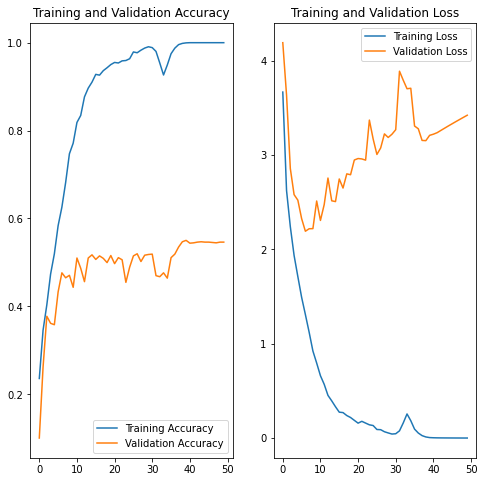

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              1)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(64, 3,input_shape = image_batch, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  BatchNormalization(),
  layers.Dense(128, activation='relu'),
  BatchNormalization(),
  layers.Dense(128, activation='relu'),
  BatchNormalization(),
  layers.Dense(128, activation='relu'),
  BatchNormalization(),
  layers.Dense(128, activation='relu'),
  BatchNormalization(),
  layers.Dense(128, activation='relu'),
  BatchNormalization(),
  layers.Dense(128, activation='relu'),
  BatchNormalization(),
  layers.Dense(107, activation='softmax'),
  BatchNormalization(),
  layers.Dense(num_classes)
])

In [ ]:
BatchNormalization(),model.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

(<keras.layers.normalization.batch_normalization.BatchNormalization at 0x7fbd539b4ad0>,
 None)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 1)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 1)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 64)      640       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 89, 89, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 89, 89, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 44, 44, 64)       0         
 2D)                                                  

In [ ]:
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
156/156 [==============================] - 8s 33ms/step - loss: 3.9015 - accuracy: 0.1478 - val_loss: 4.1348 - val_accuracy: 0.1173
Epoch 2/50
156/156 [==============================] - 5s 30ms/step - loss: 3.0155 - accuracy: 0.2536 - val_loss: 3.7854 - val_accuracy: 0.1365
Epoch 3/50
156/156 [==============================] - 5s 31ms/step - loss: 2.6819 - accuracy: 0.2991 - val_loss: 3.3574 - val_accuracy: 0.2321
Epoch 4/50
156/156 [==============================] - 5s 31ms/step - loss: 2.4931 - accuracy: 0.3391 - val_loss: 2.9202 - val_accuracy: 0.2747
Epoch 5/50
156/156 [==============================] - 5s 32ms/step - loss: 2.3514 - accuracy: 0.3568 - val_loss: 3.4625 - val_accuracy: 0.2337
Epoch 6/50
156/156 [==============================] - 5s 31ms/step - loss: 2.2702 - accuracy: 0.3740 - val_loss: 3.4399 - val_accuracy: 0.2024
Epoch 7/50
156/156 [==============================] - 5s 32ms/step - loss: 2.1354 - accuracy: 0.3905 - val_loss: 2.8423 - val_accuracy: 0.2932

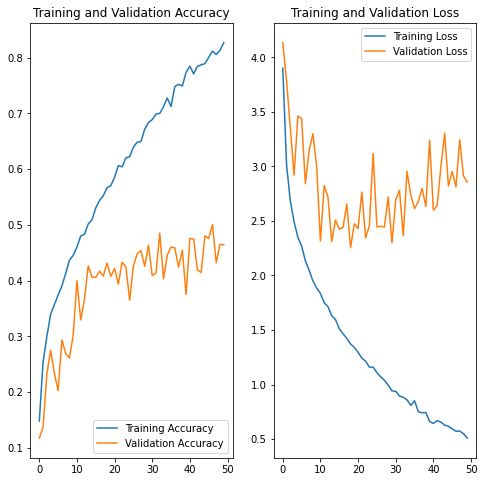

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 1)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 1)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 64)      640       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 89, 89, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 89, 89, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 44, 44, 64)       0         
 2D)                                                  